Python for Data Analysis, GMC, Vilnius University, 2025

# HW4: Training a succesfull machine learning (ML) model

- **Tasks in this homework are built around a single data file** which should be downloaded in the Notebook as asked in the cell after the imports.
- Packages allowed to be imported (but not necessarily needed): `scikit-learn`, `numpy`, `pandas`, `matplotlib`, `seaborn`, `tqdm`, `itertools`, `math`, `string`. Do not import any other packages.
- **You will need to upload your solutions into your Github repository** dedicated for the Python for Data Analysis course. Use the same repository used for Homework 3.
- Same requirements as for Homework 3:
   - Do not write docstrings (function description comments).
   - Keep prints informative.
   - Do not create classes.
   - Do not change assert statements.

There are 5 tasks in this Notebook. They have slightly different numbers of points between them, with subpoints shown for each subtask e.g. (0.2p). You need to collect 8 points in total to get the maximum grade.

As previously, each task consists of a text cell with task description, a code cell to solve the task, and a code cell with `assert` statements to check your code for *some* possible errors.

Don't hesitate to contact me or Martynas if you are stuck.

In [8]:
# your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AffinityPropagation, DBSCAN, SpectralClustering, KMeans
from itertools import product
from tqdm import tqdm


In [ ]:
# download the file using the link provided, by any method you like/understand the most,
# but the downloading process should happen inside the Notebook.
file_url = "https://github.com/Tallivm/vu-python/blob/main/hw4_2025.csv"

In [2]:
# Run this cell to store the name of the column to predict.
# Use this variable when needed.
TO_PREDICT = 'snail_genus'

# 🍂 Task 1 (1 point): The new challenge

Some researchers who collected data for SNAILAB complained that measuring a single sample takes a lot of time and is quite difficult. Many snails are actually found on fallen leaves, not on whole plants, making several measurements impossible to make. Moreover, if a snail hides inside its shell, for certain measurements the researcher is forced to wait until the snail fully appears again.

An intern from SNAILAB suggested that they could use AI to solve this issue. After several discussions, they decided to train a model which would **predict the genus of a snail** from only easy-to-measure features. The intern prepared some useful data but then got sick. So, SNAILAB asks for your help once more.

You will need to train several simple models to predict snail genus for a provided data set, and select the best model.

But first - the provided **data should be explored**!

1. (0.2p) Load the data as a DataFrame, name it `raw`. Make sure the "Unnamed: 0" column is not formed by providing correct parameters into the `read_csv()` function. Print out a short report (in any format you like, make it a function) using f-strings and containing this information:
   - Number of NaN values in total, and if there are NaNs, then in which columns and how many;
   - Min, mean, and max values of each numeric column;
   - Unique values and their counts of each categorical column.

2. (0.4p) According to the report, make certain changes to the data and name the result `clean`:
   - If there are NaNs, remove full rows with them;
   - Remove full rows containing seemingly incorrect measurement values (e.g. negative values for length measurements).
   - Even if these steps were not required for this data, do it nevertheless, in a way that could be applicable to any dataset with such requirements (but maybe different columns and values).

3. (0.1p) Print out the report again using the previously written function.

4. (0.3p) Obtain and visualize a Spearman correlation matrix (as a heatmap) for all numeric columns. Make sure colormap is used correctly (divergent, zero in the middle), and the plot contains column names.


========== REPORT: RAW DATA ==========

[Missing Values]
Total NaNs: 8
Columns with NaNs:
  - snail_genus: 1
  - leaf_width_mm: 1
  - leaf_surface: 1
  - shell_height_mm: 1
  - shell_color: 1
  - shell_radius_mm: 3

[Numeric Columns]
leaf_width_mm        | Min: 1.00     | Mean: 46.64    | Max: 83.00   
leaf_length_mm       | Min: 2.00     | Mean: 62.25    | Max: 133.00  
shell_height_mm      | Min: -9.00    | Mean: 6.43     | Max: 12.00   
shell_radius_mm      | Min: -7.00    | Mean: 6.52     | Max: 13.00   

[Categorical Columns]

Column: 'snail_genus' (Unique: 7)
  Counts:
    - Flexorus       : 440
    - Caracolus      : 415
    - Slimospira     : 403
    - Mollisphora    : 391
    - Lunaspira      : 381
    - Helixoda       : 300
    - Spiralina      : 275

Column: 'leaf_surface' (Unique: 3)
  Counts:
    - waxy           : 968
    - smooth         : 844
    - hairy          : 793

Column: 'shell_color' (Unique: 5)
  Counts:
    - dark           : 1084
    - yellow         : 936
 

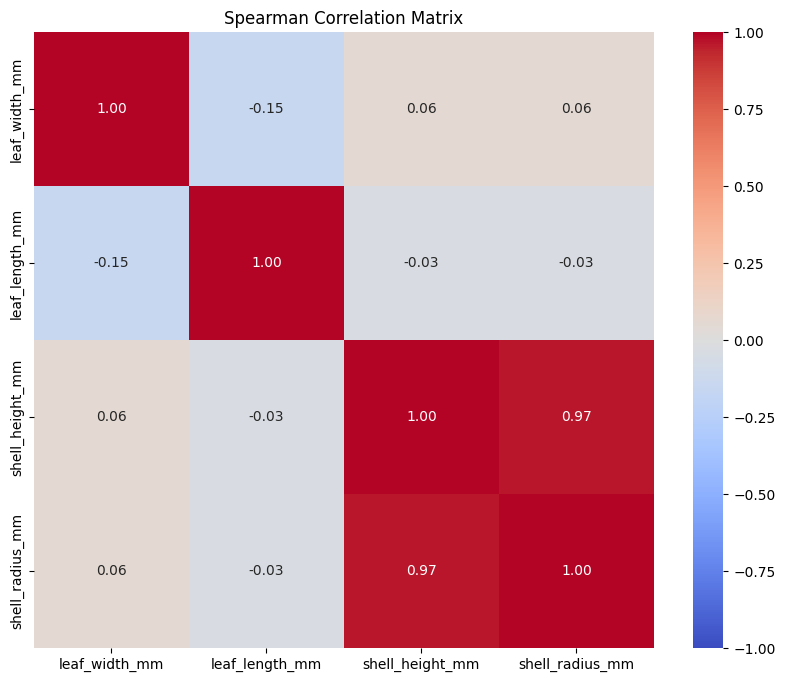

In [3]:

plt.rcParams['figure.figsize'] = (10, 6)

url = "https://raw.githubusercontent.com/Tallivm/vu-python/main/hw4_2025.csv"
try:
    raw = pd.read_csv(url, index_col=0)
except Exception as e:
    print(f"Error: {e}")
    raw = pd.DataFrame()

def generate_report(df, title="Data"):
    print(f"\n{'='*10} REPORT: {title} {'='*10}")

    total_nans = df.isna().sum().sum()
    print(f"\n[Missing Values]")
    print(f"Total NaNs: {total_nans}")
    if total_nans > 0:
        nan_cols = df.isna().sum()
        print("Columns with NaNs:")
        for col, count in nan_cols[nan_cols > 0].items():
            print(f"  - {col}: {count}")

    print(f"\n[Numeric Columns]")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        for col in numeric_cols:

            print(f"{col:<20} | Min: {df[col].min():<8.2f} | Mean: {df[col].mean():<8.2f} | Max: {df[col].max():<8.2f}")
    else:
        print("No numeric columns found.")

    print(f"\n[Categorical Columns]")
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        for col in cat_cols:
            unique_count = df[col].nunique()
            print(f"\nColumn: '{col}' (Unique: {unique_count})")
            print("  Counts:")

            counts = df[col].value_counts()
            for val, count in counts.items():
                print(f"    - {val:<15}: {count}")
    else:
        print("No categorical columns found.")
    print("="*40)

if not raw.empty:
    generate_report(raw, "RAW DATA")

    clean = raw.copy()

    clean = clean.dropna()

    numeric_cols = clean.select_dtypes(include=[np.number]).columns
    clean = clean[(clean[numeric_cols] >= 0).all(axis=1)]

    generate_report(clean, "CLEANED DATA")
    print("\n--- Spearman Correlation Matrix ---")
    plt.figure(figsize=(10, 8))
    sns.heatmap(clean.corr(method='spearman', numeric_only=True),
                annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.title("Spearman Correlation Matrix")
    plt.show()

In [4]:
assert isinstance(raw, pd.DataFrame)
assert isinstance(clean, pd.DataFrame)
assert clean.isna().sum().sum() == 0
assert len(raw.columns) == len(clean.columns)
assert TO_PREDICT in raw.columns
assert TO_PREDICT in clean.columns

# 🔨 Task 2 (1 point): Data transformation and preparation for training

Next step is to prepare data for the model training. The DataFrame created during this task should be called `transformed`.

1. (0.4p) Standardize numeric columns:
   - using the `scikit-learn` package;
   - using just `numpy`;
   - Compare results and show that they are the same or similar enough. If there is any difference, notice how big it is.
2. (0.3p) Encode all categorical columns except snail genus using one-hot encoding from `pandas` or `scikit-learn`. Make sure that in the end, there are N-1 columns for a categorical column with N unique values. Make sure that old categorical columns are not left in the data.
3. (0.2p) Encode the snail genus as integer column using `pandas` or `numpy`. Make sure to create a dictionary `snail_classes` mapping snail genera and integers.
4. (0.1p) Create `X` and `y` from the whole data. The `X` should contain all columns except the snail genus column, and the `y` should contain only the snail genus column and be a `Series` object.

In [5]:

numeric_cols = clean.select_dtypes(include=['number']).columns
scaler = StandardScaler()
scaled_sklearn = scaler.fit_transform(clean[numeric_cols])

mean = clean[numeric_cols].mean()
std = clean[numeric_cols].std(ddof=0)
scaled_numpy = (clean[numeric_cols] - mean) / std

print(f"Difference between methods: {np.sum(np.abs(scaled_sklearn - scaled_numpy.values)):.10f}")

cat_cols = clean.select_dtypes(include=['object']).columns.drop('snail_genus')

transformed = pd.get_dummies(clean, columns=cat_cols, drop_first=True)

transformed[numeric_cols] = scaled_sklearn

snail_classes = {genus: i for i, genus in enumerate(clean['snail_genus'].unique())}
transformed['snail_genus'] = clean['snail_genus'].map(snail_classes)

X = transformed.drop('snail_genus', axis=1)
y = transformed['snail_genus']

print(f"X shape: {X.shape}, y shape: {y.shape}")
print("Snail classes mapping:", snail_classes)

Difference between methods: 0.0000000000
X shape: (2596, 10), y shape: (2596,)
Snail classes mapping: {'Spiralina': 0, 'Slimospira': 1, 'Mollisphora': 2, 'Flexorus': 3, 'Helixoda': 4, 'Caracolus': 5, 'Lunaspira': 6}


In [6]:
assert isinstance(transformed, pd.DataFrame)
assert transformed.isna().sum().sum() == 0
assert len(transformed.columns) > len(clean.columns)
assert TO_PREDICT in transformed.columns
assert transformed[TO_PREDICT].dtype == int
assert str not in transformed.dtypes  # CHECK IF WORKS
assert 2 in transformed[TO_PREDICT]
assert isinstance(X, pd.DataFrame)
assert len(X.columns) == len(transformed.columns) - 1
assert isinstance(y, pd.Series)
assert isinstance(snail_classes, dict)

# 🎓 Task 3 (1 point): Model training and evaluation

Write a function named `split_and_train_model` which uses the standard model training pipeline:
- It should take `X`, `y`, `random_seed`, and a function (type `Callable`) to create the model. It should also take an optional `max_iter` parameter with default value of 300.
- Inside, it should:
   - Correctly split `X` and `y` into `X_train`, `y_train`, `X_test`, `y_test`. You can use different names but the structure should remain the same. Use test size of 20%. Use `random_seed` to fix the random state of data splitting.
   - Create an instance of the chosen model (by calling the provided function), with its random seed fixed to `random_seed` parameter.
   - Use the model to fit `X_train` and `y_train`.
   - Use the fitted model to generate predictions from `X_test`.
   - Calculate the accuracy score by comparing `y_test` and obtained predictions. Print out the score (formatted using f-string).
   - Return the trained model.
   - In case of **any** exception, do not raise it, but print out the error message and return `None` instead.

As an usage example, use this function with the data prepared in Task 2 and `LogisticRegression` from `scikit-learn`.

In [7]:

def split_and_train_model(X, y, random_seed, model_func, max_iter=300):
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_seed, stratify=y
        )

        try:
            model = model_func(random_state=random_seed)
        except TypeError:
            model = model_func()

        if hasattr(model, 'max_iter'):
             model.max_iter = max_iter
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        print(f"Model accuracy: {acc:.4f}")

        return model

    except Exception as e:
        print(f"Error during training: {e}")
        return None

print("--- Usage Example: Logistic Regression ---")

if 'X' in locals() and 'y' in locals():
    trained_logreg = split_and_train_model(X, y, 42, LogisticRegression)
else:
    print("Klaida: X ir y kintamieji nerasti. Įvykdykite Task 2.")

--- Usage Example: Logistic Regression ---
Model accuracy: 0.6962


In [ ]:
# no asserts there!

# 🧩 Task 4 (2 points): Feature extraction - clustering

Someone from SNAILAB theorized that knowing the genus of the plant which the leaf belongs to should help predict the genus of the snail, as certain snails are attracted to certain plants. However, the dataset does not contain plant names, and either way, plant identification requires additional time and skill.

Instead, you can use unsupervised learning to cluster plant features and use this information as a new feature.

1. (0.1p) Create a new DataFrame `plants` containing only plant features from `transformed`. Here, you are allowed to write column names manually.
2. (0.9p) You will use several clustering methods: [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html), [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), and [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). They allow to provide different clustering parameters. Create a list `cluster_setups` containing `tuple[str, Callable, dict]` items (setups), where `str` is a short model name just for printing purposes, `Callable` is the clustering function (which you will call), and `dict` is a dictionary of 1-2 parameters to provide to that function.
   - There should be several setups for each clustering method. Use `for` loops to create those setups automatically by going through lists of possible parameters. You are allowed to write the lists manually or use `np.linspace` and similar functions:
      - For Affinity Propagation, use 2-3 different `damping` values between 0.6 and 0.9;
      - For Spectral Clustering and KMeans, use 4-5 `n_clusters` values between 3 and 20.
      - For DBSCAN, use 4-5 `eps` values between 0.1 and 0.5, and 4-5 `min_samples` values between 5 and 40 (so each DBSCAN setup had two provided parameters instead of one).
3. (1.0p) For each setup in `cluster_setups`, fit a clustering model on `plants` data and get the preidcted labels for all plants. Save the labels into a dictionary `obtained_clusters` which should be of type `dict[str, list]`, The `str` keys should be some kind of automatically generated short model descriptions (e.g. use f-string and include used parameter values in it). The `list` values should be lists of predicted cluster labels.
   - You may want to use `tqdm` at this point, as some clustering methods are slower.

In [11]:


if 'transformed' in locals() and not transformed.empty:

    snail_cols = ['snail_age', 'snail_body_length', 'snail_eye_length', 'snail_genus']
    plants = transformed.drop(columns=snail_cols, errors='ignore')

    cluster_setups = []
    random_seed = 42

    for d in np.linspace(0.6, 0.9, 3):
        cluster_setups.append(
            ('AffinityPropagation', AffinityPropagation, {'damping': d, 'random_state': random_seed})
        )

    n_clusters_list = np.linspace(3, 20, 5, dtype=int)
    for n in n_clusters_list:
        cluster_setups.append(
            ('SpectralClustering', SpectralClustering, {'n_clusters': n, 'random_state': random_seed, 'assign_labels': 'discretize'})
        )
        cluster_setups.append(
            ('KMeans', KMeans, {'n_clusters': n, 'random_state': random_seed, 'n_init': 'auto'})
        )

    eps_list = np.linspace(0.1, 0.5, 4)
    min_samples_list = np.linspace(5, 40, 4, dtype=int)

    for eps, min_samples in product(eps_list, min_samples_list):
        cluster_setups.append(
            ('DBSCAN', DBSCAN, {'eps': eps, 'min_samples': min_samples})
        )

    obtained_clusters = {}

    for name, model_class, params in tqdm(cluster_setups):
        try:
            model = model_class(**params)

            if hasattr(model, 'fit_predict'):
                labels = model.fit_predict(plants)
            else:
                model.fit(plants)
                labels = model.labels_
            param_str = "_".join([f"{k}={v:.2f}" if isinstance(v, float) else f"{k}={v}" for k, v in params.items()])
            key = f"{name}_{param_str}"

            obtained_clusters[key] = labels

        except Exception as e:
            print(f"Failed: {name} {params} -> {e}")
    print(f"Clustering finished. Generated {len(obtained_clusters)} sets of labels.")

else:
    print("Klaida: 'transformed' duomenys nerasti. Įvykdykite Task 2.")

100%|██████████| 29/29 [01:01<00:00,  2.14s/it]

Clustering finished. Generated 29 sets of labels.


In [12]:
assert isinstance(plants, pd.DataFrame)
assert isinstance(cluster_setups, list)
assert isinstance(obtained_clusters, dict)
assert len(cluster_setups) == len(obtained_clusters)
assert len(cluster_setups) >= 26

# 👑 Task 5 (2 points): Using extracted features to improve the result

The only thing left now is to check which clustering setup produced a new feature (predicted plant clusters) which improves the Logistic Regression model trained in Task 3.

1. (1.0p) For each plant clustering result from Task 4, check if it improves the accuracy of logistic regression:
   - Create a new variable `XX` containing the `X` from Task 2 but joined with the new feature. If the shape of `X` was (M, N), then the shape of `XX` should be (M, N+1).
   - Using already written `split_and_train_model` function, create and fit a new logistic regression model on `XX` (`y` remains unchanged from Task 2). You may need to increase `max_iter` here. Don't forget to use the same random seed for all models.
2. (1.0p) Automatically find the feature which produced the best result from all trained Logistic Regression models. Print out its name and received accuracy score.


In [13]:

if 'obtained_clusters' in locals() and 'X' in locals() and 'y' in locals():

    best_accuracy = 0.0
    best_feature_name = None

    print(f"Evaluating {len(obtained_clusters)} clustering setups...")

    for name, labels in obtained_clusters.items():
        print(f"\nTesting with feature: {name}")

        XX = X.copy()
        XX['plant_cluster'] = labels

        model = split_and_train_model(XX, y, 42, LogisticRegression, max_iter=1000)

        if model:
            _, X_test_temp, _, y_test_temp = train_test_split(
                XX, y, test_size=0.2, random_state=42, stratify=y
            )

            current_score = accuracy_score(y_test_temp, model.predict(X_test_temp))

            if current_score > best_accuracy:
                best_accuracy = current_score
                best_feature_name = name

    print("\n" + "="*30)
    print("SEARCH FINISHED")
    print(f"Best feature: {best_feature_name}")
    print(f"Best accuracy: {best_accuracy:.4f}")
    print("="*30)

else:
    print("Klaida: Trūksta duomenų (X, y arba obtained_clusters). Įvykdykite Task 2 ir Task 4.")

Evaluating 29 clustering setups...

Testing with feature: AffinityPropagation_damping=0.60_random_state=42


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 0.6923

Testing with feature: AffinityPropagation_damping=0.75_random_state=42


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 0.7135

Testing with feature: AffinityPropagation_damping=0.90_random_state=42


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 0.6885

Testing with feature: SpectralClustering_n_clusters=3_random_state=42_assign_labels=discretize
Model accuracy: 0.7365

Testing with feature: KMeans_n_clusters=3_random_state=42_n_init=auto
Model accuracy: 0.7385

Testing with feature: SpectralClustering_n_clusters=7_random_state=42_assign_labels=discretize
Model accuracy: 0.7000

Testing with feature: KMeans_n_clusters=7_random_state=42_n_init=auto
Model accuracy: 0.7308

Testing with feature: SpectralClustering_n_clusters=11_random_state=42_assign_labels=discretize
Model accuracy: 0.7365

Testing with feature: KMeans_n_clusters=11_random_state=42_n_init=auto
Model accuracy: 0.7385

Testing with feature: SpectralClustering_n_clusters=15_random_state=42_assign_labels=discretize
Model accuracy: 0.7019

Testing with feature: KMeans_n_clusters=15_random_state=42_n_init=auto
Model accuracy: 0.7038

Testing with feature: SpectralClustering_n_clusters=20_random_state=42_assign_labels=discretize
Model accuracy: 0.7173



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 0.6885

Testing with feature: DBSCAN_eps=0.37_min_samples=16
Model accuracy: 0.6788

Testing with feature: DBSCAN_eps=0.37_min_samples=28
Model accuracy: 0.6750

Testing with feature: DBSCAN_eps=0.37_min_samples=40
Model accuracy: 0.6635

Testing with feature: DBSCAN_eps=0.50_min_samples=5
Model accuracy: 0.7115

Testing with feature: DBSCAN_eps=0.50_min_samples=16
Model accuracy: 0.7288

Testing with feature: DBSCAN_eps=0.50_min_samples=28
Model accuracy: 0.7019

Testing with feature: DBSCAN_eps=0.50_min_samples=40
Model accuracy: 0.6885

SEARCH FINISHED
Best feature: KMeans_n_clusters=3_random_state=42_n_init=auto
Best accuracy: 0.7385


In [ ]:
# no asserts again!